### Лабораторная №1
![Picture for task](https://sun9-28.userapi.com/c855228/v855228840/223cd9/Iyxz1WNXnf0.jpg)
***Вариант 4***
$$ Y=\sqrt{x}, a=1, b=5 $$

1. Параметры равномерного распределения:  
$$ m_{x} = \frac {a+b}{2}=3, ~ \sigma_{x} = \sqrt{\frac{(b-a)^2}{12}}=\frac {2\sqrt{3}}{3} $$
Выборка генерируется встроенной функцией `random()`, которая возвращает число из интервала `[0,1)`

In [24]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np
from math import sqrt

In [25]:
f = lambda x: sqrt(x)
a = 1
b = 5

In [26]:
n = int(input())

30


In [27]:
x = [a + (b - a) * random.uniform(0, 1) for _ in range(n)]
y = [round(f(val), 3) for val in x]

2. Вариационный ряд и эмпирическая функция

In [28]:
var_series = sorted(y)
count = [y.count(val) for val in y]

table = pd.DataFrame(
    {
        'y_i': var_series,
        'n_i': count
    }
)
print("Вариационный ряд")
table

Вариационный ряд


,y_i,n_i
0,1.031,1
1,1.038,2
2,1.089,1
3,1.173,1
4,1.217,1
5,1.246,1
6,1.332,1
7,1.354,1
8,1.535,1
9,1.620,1


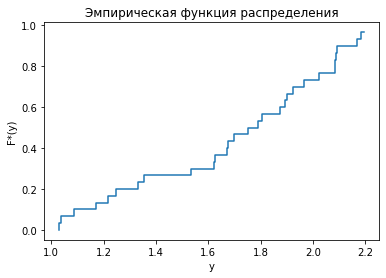

In [29]:
# эмпирическая функция распределения: count(X < x0) / count(X)
F = lambda X, x0: float(len([num for num in X if num < x0])) / float(len(X))

plt.step(var_series, [F(y, y0) for y0 in var_series])
plt.xlabel('y')
plt.ylabel('F*(y)')
plt.title("Эмпирическая функция распределения")
plt.show()

3. Теоретическая функция распределения $ G(Y) $


$$ f(x) = \begin{cases}
\frac {1}{4}, x \in [1,5], \\
0, x \notin [1,5] \\
\end{cases}
$$
$$ y = \phi(x)= \sqrt {x}$$
$$x=\psi(y)= y^2$$
$$ |\psi'(y)| = 2y $$
$$ g(y) = \phi(y)=f(\psi(y))|\psi'(y)| $$
$$ g(y)= \frac {y}{2}, y \in [1, \sqrt{5}] $$
$$ G(y) = \begin{cases}
0, y < 0, \\
\frac {y^2}{4} - \frac{1}{4}, y \in [1,\sqrt{5}],\\
1, y > \sqrt{5} \\
\end{cases}
$$



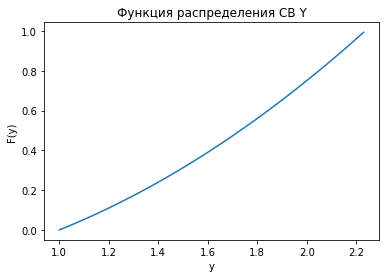

In [30]:
Y = lambda y: y ** 2 / 4 - 0.25
u = np.arange(1, sqrt(5), 0.01)
plt.plot(u, [Y(val) for val in u]) 
plt.xlabel('y')
plt.ylabel('F(y)')
plt.title("Функция распределения СВ Y")
plt.show()

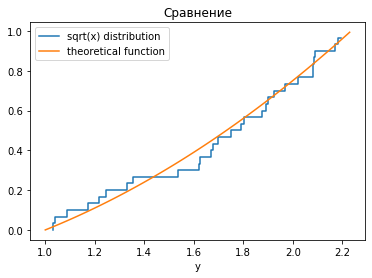

In [31]:
plt.step(var_series, [F(y, y0) for y0 in var_series], label="sqrt(x) distribution")
plt.plot(u, [Y(val) for val in u], label="theoretical function")
plt.legend(loc="best")
plt.xlabel('y')
plt.title('Сравнение')
plt.show()

### Лабораторная №2
![Picture for task](https://sun9-63.userapi.com/c855228/v855228840/223cec/DRLn0wFGFEE.jpg)

**Задание 2**  
*Равноинтервальный метод*

In [32]:
M = int(sqrt(n))
h = round((var_series[-1] - var_series[0]) / M, 3)
print(f'M={M}, h={h}')

M=5, h=0.232


In [33]:
A_i = [round(var_series[0] + (i - 1) * h, 3) for i in range(M)]
a = A_i[:-1]
b = A_i[1:] 
intervals = list(zip(a, b))
print(intervals)
print(var_series)

[(0.799, 1.031), (1.031, 1.263), (1.263, 1.495), (1.495, 1.727)]
[1.031, 1.038, 1.089, 1.173, 1.217, 1.246, 1.332, 1.354, 1.535, 1.62, 1.625, 1.67, 1.676, 1.698, 1.751, 1.791, 1.804, 1.875, 1.893, 1.9, 1.923, 1.967, 2.021, 2.082, 2.082, 2.087, 2.091, 2.169, 2.183, 2.193]


In [34]:
v = []
for a, b in invervals:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-34-19e6a8506347>, line 3)

In [ ]:
print(v)

In [ ]:
v = [len(list(filter(lambda x: a <= x < b, y))) for a, b in intervals]
print(v)